In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## Numerical Methods to Find Roots

1. Bisection Method
2. Regula Falsi Method
3. Secant Method
4. Newton Ramphson Method
5. Brent's Method
6. Halley's Method
7. Muller's Method

### 1. Bisection Method

In [2]:
def bisection_method(f, tol=1e-6, max_iter=100):
    value_a = []
    value_b = []
    
    for i in range(-10,11):
        if f(i) < 0:
            value_a.append(i)
        elif f(i) > 0:
            value_b.append(i)

    if not value_a or not value_b:
        raise ValueError("Couldn't find a valid interval where f(a) and f(b) have opposite signs.")

    b = min(value_b)  
    a = max(value_a)
    print(f"Initial interval: a = {a}, b = {b}")

    # print('value taken for a:',value_a)
    # print('value taken for b:',value_b)
    
    if f(a) * f(b) >= 0:
        raise ValueError('The values must be one negative and one positive')

    iterations = []
    values = []

    for i in range(max_iter):
        c = (a+b)/2.0
        iterations.append(i)
        values.append(c)

        if abs(f(c)) < tol or (b-a)/2 < tol:
            return c, iterations, values

        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return c, iterations, values

In [3]:
# f = f_numeric
# bisection_root, bisection_iterations, bisection_values = bisection_method(f)
# print("Root found:", bisection_root)
# print('Iterations:', len(bisection_iterations))

In [4]:
import matplotlib.pyplot as plt

def bisection_plot(f):
    bisection_root, bisection_iterations, bisection_values = bisection_method(f)
    print("Root found:", bisection_root)
    print('Iterations:', len(bisection_iterations))
    plt.plot(bisection_iterations, bisection_values, marker='o', linestyle='-')
    plt.xlabel('Iteration')
    plt.ylabel('Approximate Root')
    plt.title('Bisection Method Convergence')
    plt.grid()
    plt.show()
    
# bisection_plot(f_numeric)

### 2. Regula Falsi Method

In [5]:
def regula_falsi_method(f,max_iter=100, tol=1e-6):

    value_a = []
    value_b = []
    
    for i in range(-10,11):
        if f(i) < 0:
            value_a.append(i)
        elif f(i) > 0:
            value_b.append(i)

    if not value_a or not value_b:
        raise ValueError("Couldn't find a valid interval where f(a) and f(b) have opposite signs.")

    b = min(value_b)  
    a = max(value_a)
    
    print(f"Initial interval: a = {a}, b = {b}")
    # print('value taken for a:',value_a)
    # print('value taken for b:',value_b)

        
    if f(a) * f(b) >= 0:
        raise ValueError('The values must be one negative and one positive')
    
    iterations = []
    values = []

    for i in range(max_iter):
        c = b - (f(b) * (b - a)) / (f(b) - f(a))
        iterations.append(i)
        values.append(c)
        
        if abs(f(c)) < tol or (b-a)/2 < tol:
            return c, iterations, values

        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return c, iterations, values

In [6]:
# f = f_numeric
# root, iterations, values = regula_falsi_method(f)
# print("Root found:", root)
# print('Iterations:', len(iterations))

In [7]:
def regula_falsi_plot(f):
    root, iterations, values = regula_falsi_method(f)
    print("Root found:", root)
    print('Iterations:', len(iterations))
    plt.plot(iterations, values, marker='o', linestyle='-')
    plt.xlabel('Iteration')
    plt.ylabel('Approximate Root')
    plt.title('Regula Falsi Method Convergence')
    plt.grid()
    plt.show()
# regula_falsi_plot(f_numeric)

### 3. Secant Method

Unlike Regula Falsi, the Secant Method does not require f(a) and f(b) to have opposite signs.

In [8]:
import random

def secant_method(f, max_iter=100, tol=1e-6):
    iterations = []
    values = []
    
    num_samples = 20
    sample_range = (-10, 10) 
    sample_points = np.linspace(sample_range[0], sample_range[1], num_samples)
    
    sample_points = np.round(sample_points).astype(int) 
    sample_points = np.unique(sample_points) 
    
    function_values = np.abs(f(sample_points))  
    
    best_indices = np.argsort(function_values)[:2]
    a, b = sample_points[best_indices]
    
    while a == b:  
        b = random.randint(-10, 10)
    print('a: ', a)
    print('b: ', b)
    
    for i in range(max_iter):
        c = b - (f(b) * (b - a)) / (f(b) - f(a))
        
        if abs(f(b)) < tol:
            return b, iterations, values 

        iterations.append(i)
        values.append(c)

        if abs(c - b) < tol:
            return c, iterations, values

        a = b
        b = c

    return c, iterations, values  

In [9]:
# f = f_numeric
# root, iterations, values = secant_method(f)
# print("Root found:", root)
# print('Iterations:', len(iterations))

In [10]:
def sceant_plot(f):
    root, iterations, values = secant_method(f)
    print("Root found:", root)
    print('Iterations:', len(iterations))
    plt.plot(iterations, values, marker='o', linestyle='-')
    plt.xlabel('Iteration')
    plt.ylabel('Approximate Root')
    plt.title('Secant Method Convergence')
    plt.grid()
    plt.show()
# sceant_plot(f_numeric)

### 4. Newton Ramphson Method

In [11]:
from sympy import symbols, diff, lambdify
import random

def newton_raphson_method(f, max_iter=100, tol=1e-6):
    # differentiating the f(x)
    x = symbols('x')  
    f_prime = diff(f, x) 
    # Converting the symbolic functions to numerical functions
    f = lambdify(x, f, "numpy")
    df = lambdify(x, f_prime, "numpy")

    best_x0 = None
    best_f_value = float('inf')

    for _ in range(10):
        x0_candidate = random.randint(-5, 5)
        while x0_candidate ==0: 
            x0_candidate = random.randint(-5, 5)
        f_value = abs(f(x0_candidate))

        if f_value < best_f_value:
            best_f_value = f_value
            best_x0 = x0_candidate

    x0 = best_x0
    print(f"Best initial x0: {x0}")

    iterations = []
    values = []

    for i in range(max_iter):
        f_x0 = f(x0)
        df_x0 = df(x0)

        if abs(df_x0) < 1e-10:
            raise ValueError("Derivative too close to zero, Newton-Raphson may not converge.")

        x_n = x0 - f_x0 / df_x0
        iterations.append(i)
        values.append(x_n)

        if abs(x_n - x0) < tol: 
            return x_n, iterations, values

        x0 = x_n 

    return x0, iterations, values 

In [12]:
# x = symbols('x')
# f = user_function
# root, iterations, values = newton_raphson_method(f)
# print(f"Root found: {root}")
# print(f"Iterations taken: {len(iterations)}")

In [13]:
def newton_raphson_plot(f):
    newton_root, newton_iterations, newton_values = newton_raphson_method(f)
    print(f"Root found: {newton_root}")
    print(f"Iterations taken: {len(newton_iterations)}")
    plt.plot(newton_iterations, newton_values, marker='o', linestyle='-')
    plt.xlabel('Iteration')
    plt.ylabel('Approximate Root')
    plt.title('Newton Ramphson Method Convergence')
    plt.grid()
    plt.show()
    
# newton_raphson_plot(user_function)

### 5. Brent's Method

reference: https://en.wikipedia.org/wiki/Brent%27s_method#:~:text=If%20f(bk)%2C,)%20%2F%204%20and%20bk.

In [14]:
def brent_method(f, tol=1e-6, max_iter=100):
    value_a = []
    value_b = []
    
    for i in range(-10,11):
        if f(i) < 0:
            value_a.append(i)
        elif f(i) > 0:
            value_b.append(i)

    if not value_a or not value_b:
        raise ValueError("Couldn't find a valid interval where f(a) and f(b) have opposite signs.")

    b = min(value_b)  
    a = max(value_a)
    
    print(f"Initial interval: a = {a}, b = {b}")
    # print('value taken for a:',value_a)
    # print('value taken for b:',value_b)
    
    if f(a) * f(b) >= 0:
        raise ValueError("The values must be one negative and one positive.")

    c, d = a, a  # Additional points for interpolation
    fa, fb, fc = f(a), f(b), f(a)
    s = b
    mflag = True  # Tracking to use bisection or not

    iterations = []
    values = []
    
    for i in range(max_iter):
        
        # Using Inverse Quadratic Interpolation
        if f(a) != f(c) and f(b) != f(c): 
            s = (a * f(b) * f(c)) / ((f(a) - f(b)) * (f(a) - f(c))) + \
                (b * f(a) * f(c)) / ((f(b) - f(a)) * (f(b) - f(c))) + \
                (c * f(a) * f(b)) / ((f(c) - f(a)) * (f(c) - f(b)))
            s_name = 'Inverse'
            
        # Use Secant Method
        else:
            s = b - (f(b) * (b - a)) / (f(b) - f(a))
            s_name = 'Secant'

        cond1 = (s < (3 * a + b) / 4 or s > b)
        cond2 = mflag and abs(s - b) >= abs(b - c) / 2
        cond3 = not mflag and abs(s - b) >= abs(c - d) / 2
        cond4 = mflag and abs(b - c) < tol
        cond5 = not mflag and abs(c - d) < tol
        
        # Bisection
        if cond1 or cond2 or cond3 or cond4 or cond5:
            s = (a + b) / 2  
            mflag = True
            s_name = 'Bisection'
        else:
            mflag = False

        values.append(s)
        iterations.append(i)
        # print(f'the methods used in step: {i} is {s_name}')
        fs = f(s)
        d, c = c, b
        fc = fb
        if f(a) * fs < 0:
            b, fb = s, fs
        else:
            a, fa = s, fs

        if abs(fa) < abs(fb):
            a, b = b, a
            fa, fb = fb, fa

        if abs(fb) < tol:
            return b, iterations, values  
            
    return b, iterations, values

In [15]:
# f = f_numeric
# root, iterations, values = brent_method(f)
# print(f"Root found: {root}")
# print(f'Values: ', values)
# print(f'Iterations: {len(iterations)}')

In [16]:
def brents_plot(f):
    root, iterations, values = brent_method(f)
    print(f"Root found: {root}")
    print(f'Iterations: {len(iterations)}')
    plt.plot(iterations, values, marker='o', linestyle='-')
    plt.xlabel('Iteration')
    plt.ylabel('Approximate Root')
    plt.title('Brent Method Convergence')
    plt.grid()
    plt.show()
# brents_plot(f_numeric)

### 6. Halley's Method

Halley’s method is an extension of Newton-Raphson's method, using the second derivative to achieve cubic convergence (which is even faster than Newton’s quadratic convergence).

In [17]:
def halley_method(f, tol=1e-6, max_iter=100):
    x = symbols('x')
    
    f_prime = diff(f, x)   
    f_double_prime = diff(f_prime, x)  

    f_numeric = lambdify(x, f, 'numpy')
    f_prime_numeric = lambdify(x, f_prime, 'numpy')
    f_double_prime_numeric = lambdify(x, f_double_prime, 'numpy')

    best_x0 = None
    best_f_value = float('inf')
    
    for i in range(-10, 11): 
        f_val = abs(f_numeric(i))
        if f_val < best_f_value:
            best_f_value = f_val
            best_x0 = i

    x_n = best_x0 
    print(f"Initial guess x0: {x_n}")

    iterations = []
    values = []

    for i in range(max_iter):
        fx_n = f_numeric(x_n)
        fpx_n = f_prime_numeric(x_n)
        fppx_n = f_double_prime_numeric(x_n)

        iterations.append(i)
        values.append(x_n)

        if abs(fx_n) < tol:
            return x_n, iterations, values 

        denominator = 2 * fpx_n**2 - fx_n * fppx_n
        if abs(denominator) < 1e-12: 
            raise ValueError("Halley's method failed: near zero second derivative.")

        x_next = x_n - (2 * fx_n * fpx_n) / denominator
        
        if abs(x_next - x_n) < tol:
            return x_next, iterations, values

        x_n = x_next

    return x_n, iterations, values

In [18]:
# x = symbols('x')
# f = user_function
# root, iterations, values = halley_method(f)
# print(f"Root found: {root}")
# print(f'Iterations: {len(iterations)}')

In [19]:
def halleys_plot(f):
    root, iterations, values = halley_method(f)
    print(f"Root found: {root}")
    print(f'Iterations: {len(iterations)}')
    plt.plot(iterations, values, marker='o', linestyle='-')
    plt.xlabel('Iteration')
    plt.ylabel('Approximate Root')
    plt.title('Halleys Method Method Convergence')
    plt.grid()
    plt.show()

# halleys_plot(user_function)

### 7. Müller’s Method

In [20]:
# def mullers_method(f, max_iter=100, tol=1e-6):
#     iterations = []
#     values = []

#     for i in range(max_iter):
#         q = (xn - xn1) / (xn1 - xn2)
#         a = (q * f(xn)) - (q * (1 + q) * f(xn1)) + ((q**2) * f(xn2))
#         b = ((2 * q + 1) * f(xn)) - ((1 + q)**2 * f(xn1)) + (q**2 * f(xn2))
#         c = ((1 + q) * f(xn))
#         r = xn - (xn - xn1) * (2 * c)/max(b) 
        

In [21]:
import numpy as np

def muller(f, tol=1e-6, max_iter=100):
    iterations = []
    values = []
    
    num_samples = 20
    sample_range = (-10, 10) 
    sample_points = np.linspace(sample_range[0], sample_range[1], num_samples)
    
    sample_points = np.round(sample_points).astype(int) 
    sample_points = np.unique(sample_points) 
    
    function_values = np.abs(f(sample_points))  
    
    best_indices = np.argsort(function_values)[:3]
    x0, x1, x2 = sample_points[best_indices]
    
    print(f'x0: {x0}')
    print(f'x1: {x1}')
    print(f'x2: {x2}')
    
    for i in range(max_iter):
        h1 = x1 - x0
        h2 = x2 - x1
        del1 = (f(x1) - f(x0)) / h1
        del2 = (f(x2) - f(x1)) / h2
        a = (del2 - del1) / (h2 + h1)
        b, c = a * h2 + del2, f(x2)
        
        if b**2 - 4*a*c >= 0:
             D = np.sqrt(b**2 - 4*a*c)
        else:
            return "Complex roots detected", iterations, values

        E = b + D if abs(b + D) > abs(b - D) else b - D
        if E == 0:
            return None, iterations, values 

        x_new = x2 - (2 * c) / E 

        iterations.append(i)
        values.append(x_new)

        if abs(x2 - x_new) < tol:
            return x_new, iterations, values 

        x0, x1, x2 = x1, x2, x_new
    
    return x2, iterations, values 

In [22]:
# f = f_numeric
# root, iterations, values = muller(f)
# print(f'Iterations: {len(iterations)}')
# print(f'Values: {values}')
# print(f'Root found: {root}')

In [23]:
def mullers_plot(f):
    root, iterations, values = muller(f)
    print(f'Iterations: {len(iterations)}')
    print(f'Root found: {root}')
    plt.plot(iterations, values, marker='o', linestyle='-')
    plt.xlabel('Iteration')
    plt.ylabel('Approximate Root')
    plt.title('Muller Method Method Convergence')
    plt.grid()
    plt.show()

# mullers_plot(f_numeric)

### Interactive Dashboard

In [24]:
import sympy as sp
import ipywidgets as widgets
from IPython.display import display

x = sp.symbols('x')

function_input = widgets.Text(
    value="x**3 - 2*x - 5", 
    description="f(x):",
    style={'description_width': 'initial'}
)

def process_function():
    user_function = function_input.value  
    try:
        function = sp.sympify(user_function) 
        f_numeric = sp.lambdify(x, function, "numpy") 
        
        print("\nFunction successfully converted:")
        return function, user_function, f_numeric
        
    except Exception as e:
        print("\nInvalid function input. Please enter a valid mathematical expression.")
        return None, None
        
function_input.observe(process_function, names='value')

display(function_input)

Text(value='x**3 - 2*x - 5', description='f(x):', style=TextStyle(description_width='initial'))

In [25]:
function, user_function, f_numeric = process_function()

print("Symbolic Function:", function)
print("User Function:", user_function)
print('f_numeric:',f_numeric)


Function successfully converted:
Symbolic Function: x**3 - 2*x - 5
User Function: x**3 - 2*x - 5
f_numeric: <function _lambdifygenerated at 0x796e44a7eef0>


Initial interval: a = 2, b = 3
Root found: 2.0945520401000977
Iterations: 20


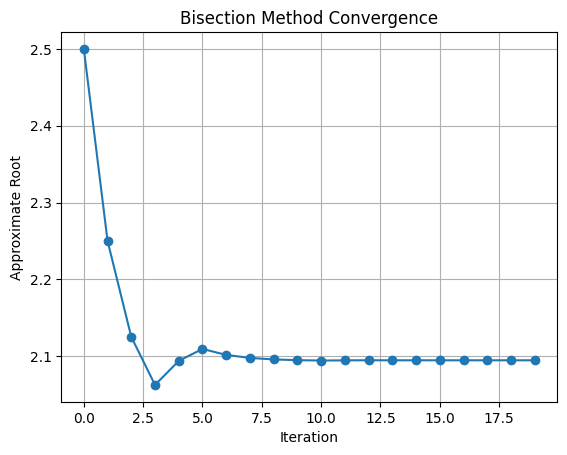

None
Initial interval: a = 2, b = 3
Root found: 2.0945513981181274
Iterations: 14


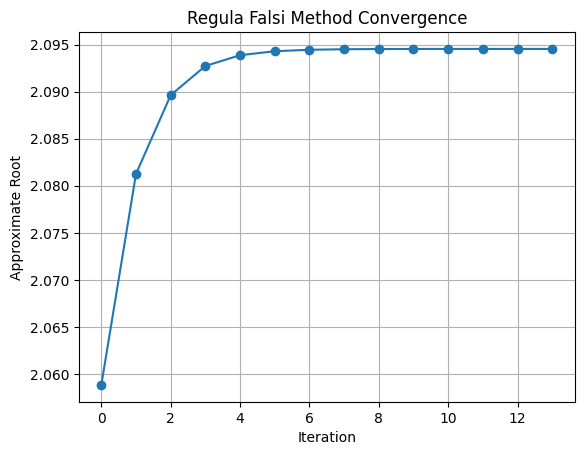

None
x0: 2
x1: -1
x2: 1
Iterations: 5
Root found: 2.0945514815423274


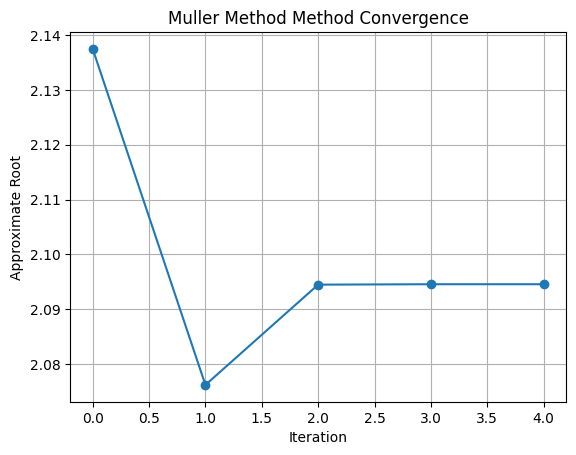

None
Initial interval: a = 2, b = 3
Root found: 2.0945514955020554
Iterations: 19


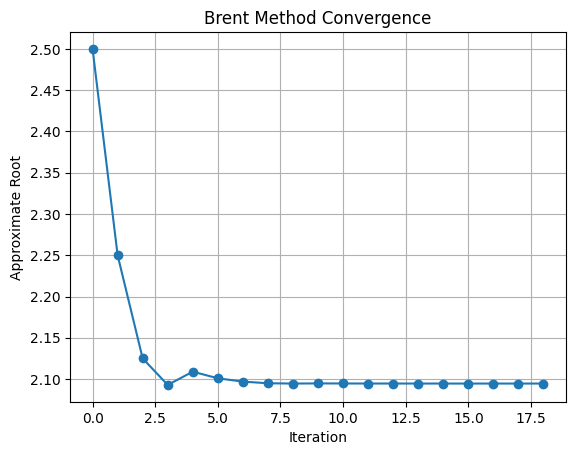

None
Initial guess x0: 2
Root found: 2.0945514815401642
Iterations: 3


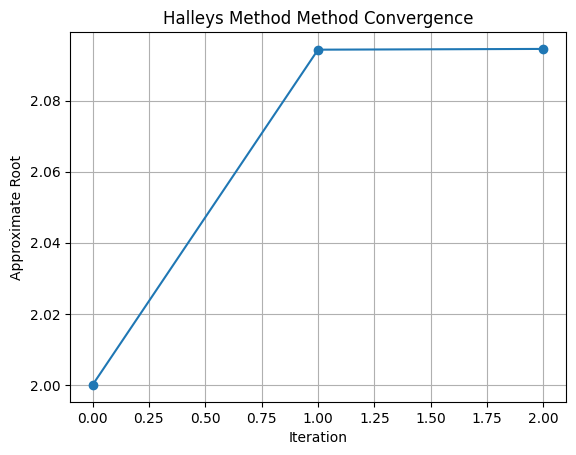

None
Best initial x0: 2
Root found: 2.0945514815423265
Iterations taken: 4


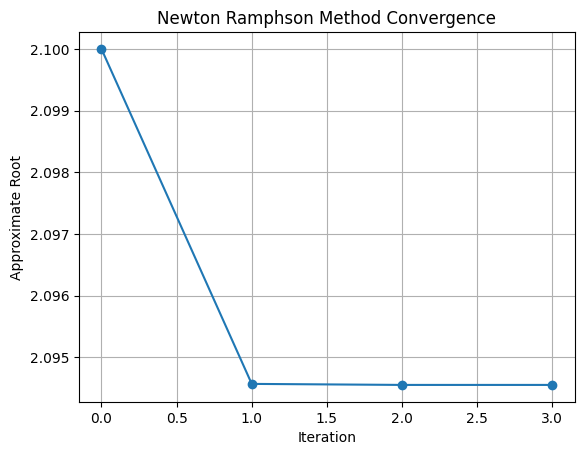

None
a:  2
b:  -1
Root found: 2.094551481247453
Iterations: 11


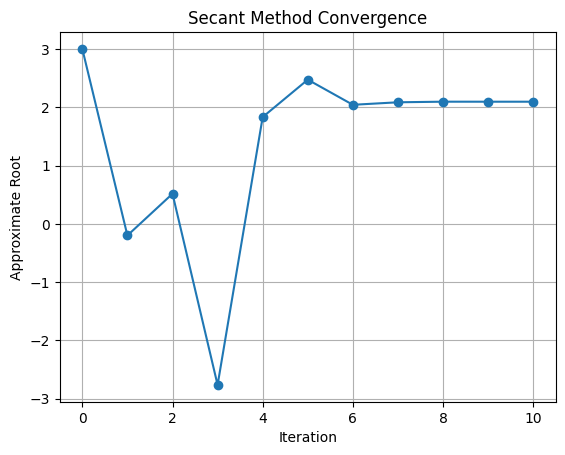

None


In [26]:
print(bisection_plot(f_numeric))
print(regula_falsi_plot(f_numeric))
print(mullers_plot(f_numeric))
print(brents_plot(f_numeric))
print(halleys_plot(user_function))
print(newton_raphson_plot(user_function))
print(sceant_plot(f_numeric))